# REPORT PROJECT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(4,4)}) # dimension creation

In [2]:
df = pd.read_csv('world-happiness-report.csv')
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
df.info() # recognize data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
df['Country name'].value_counts()

Moldova        15
South Korea    15
Canada         15
Kenya          15
Brazil         15
               ..
Oman            1
Maldives        1
Guyana          1
Suriname        1
Cuba            1
Name: Country name, Length: 166, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [6]:
# open folder
from os import mkdir

In [7]:
try:
  mkdir('Plots')

except:
  pass

mypath = 'Plots'

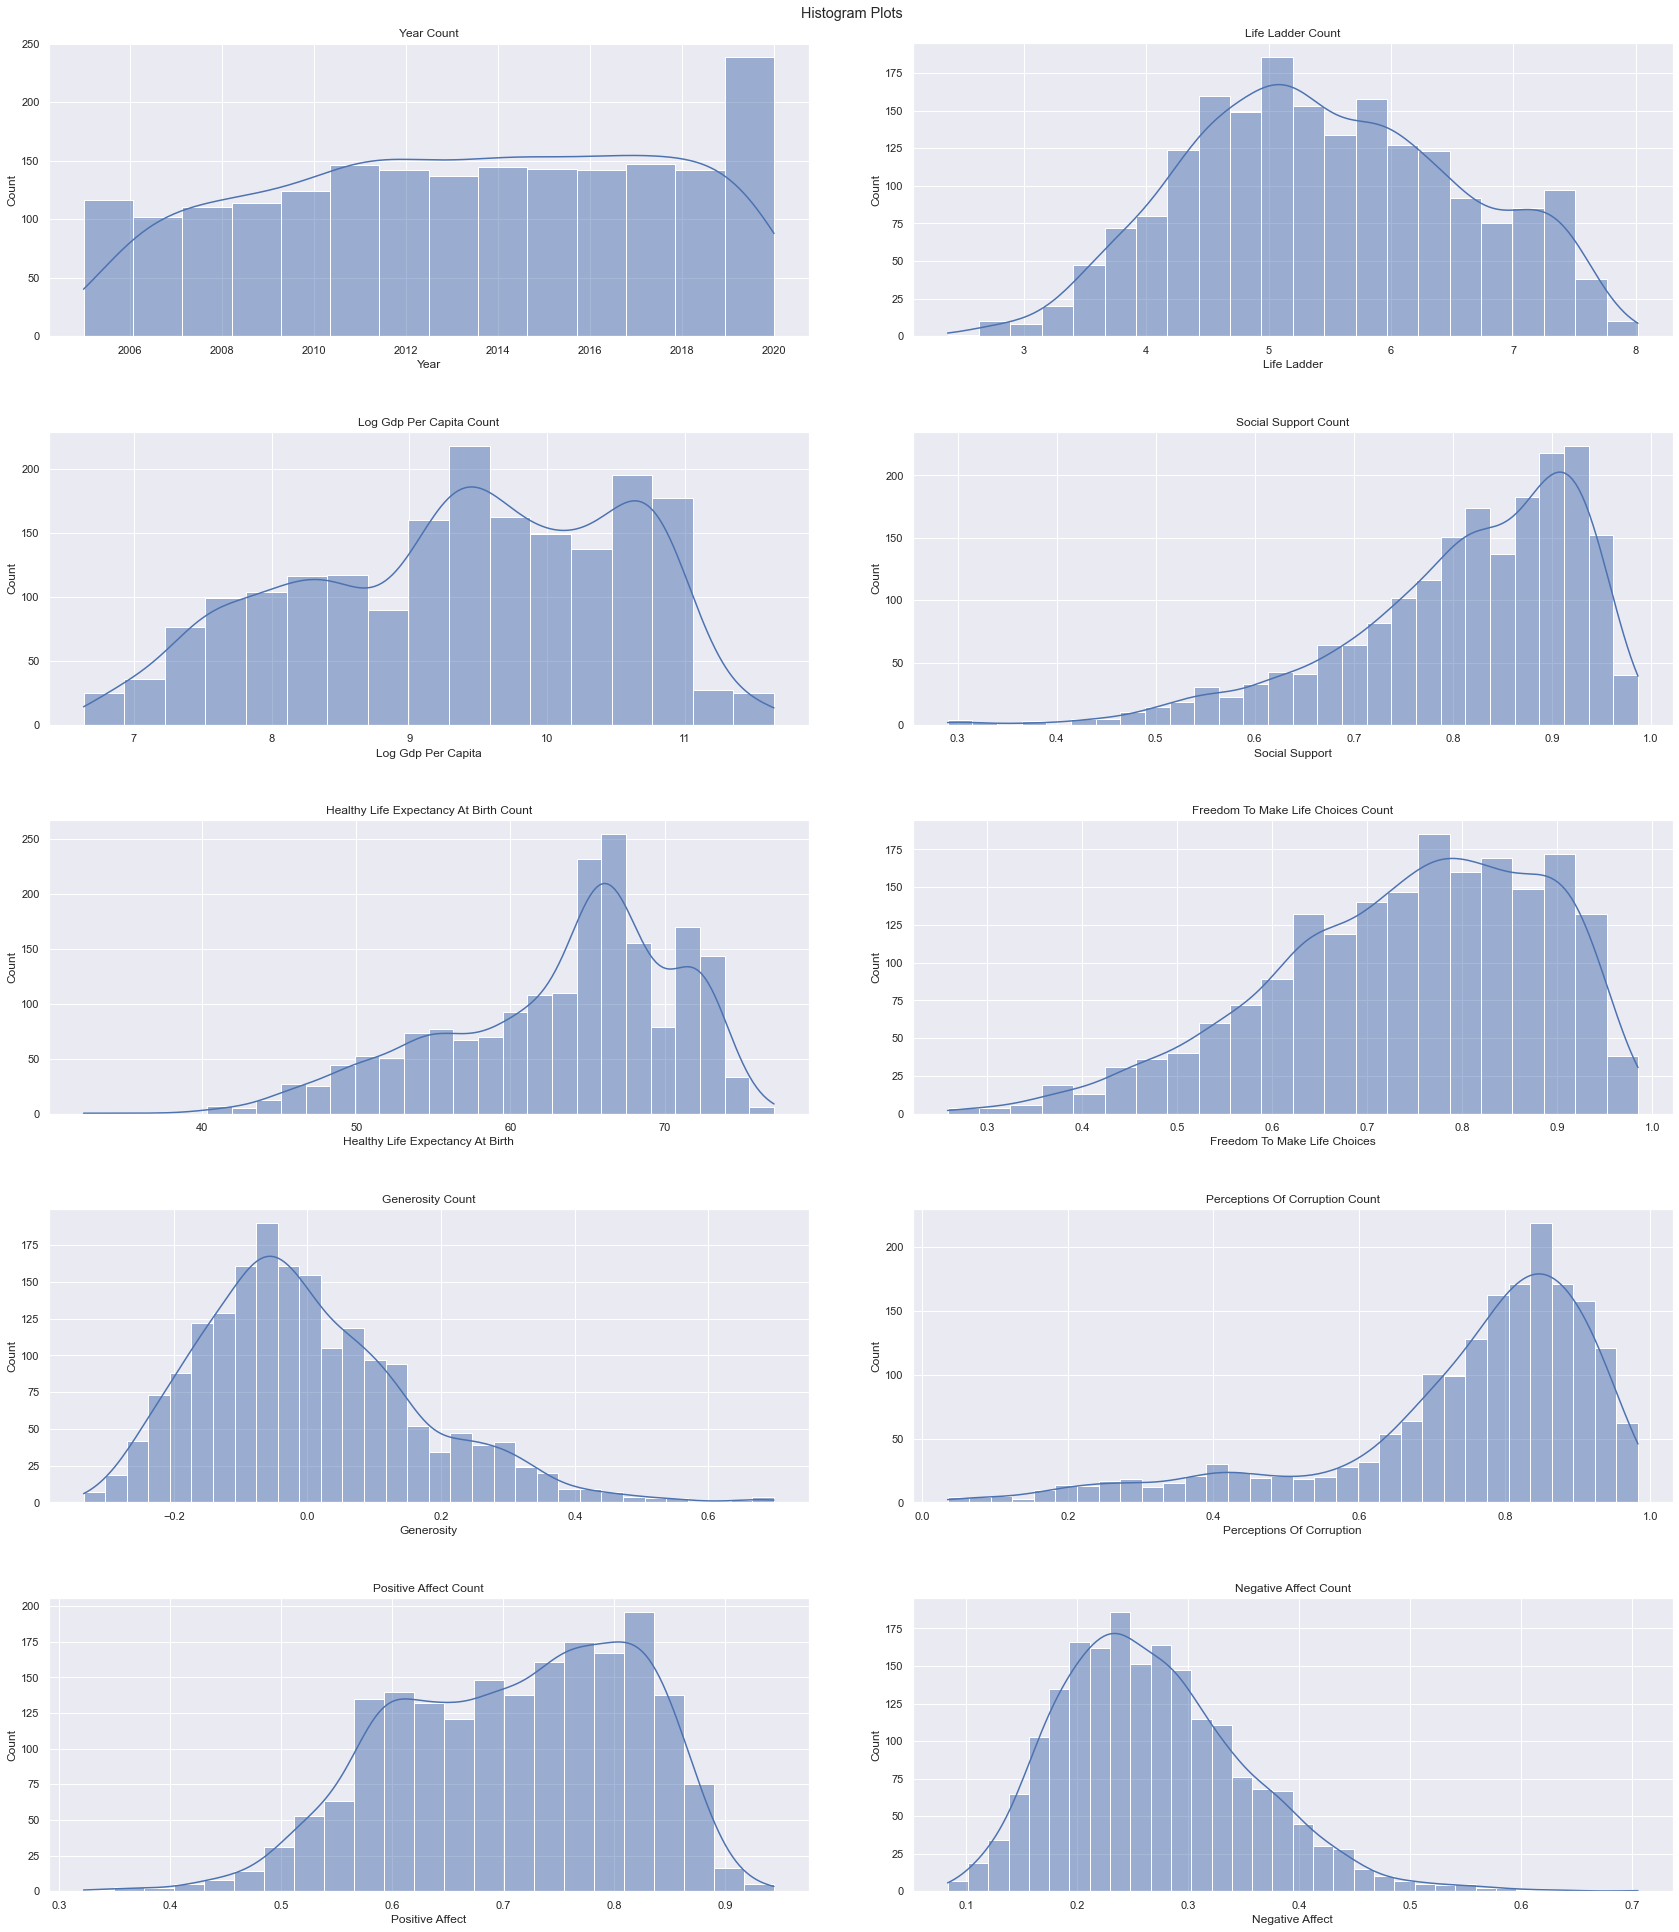

In [8]:
f, axes = plt.subplots(5,2,figsize=(25,28))
f.tight_layout(pad=6)
f.suptitle('Histogram Plots')
cols= df.select_dtypes(exclude='object') 

# assign a starting point
x_axes = 0 
y_axes = 0

# Drawing graphics on a 5x2 area
for col in cols:
  sns.histplot(data=df, x=col, kde=True, ax=axes[x_axes, y_axes]) # kde : curve at the top
  axes[x_axes,y_axes].set_xlabel(col.title())
  axes[x_axes,y_axes].set_ylabel("Count")
  axes[x_axes,y_axes].set_title(f"{col.title()} Count")
  
  if y_axes == 1:
    y_axes = 0
    x_axes += 1
  else:
    y_axes += 1
plt.savefig('Plots/histogram_plots.png')
plt.show()

In [9]:
df.select_dtypes(exclude='object').columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

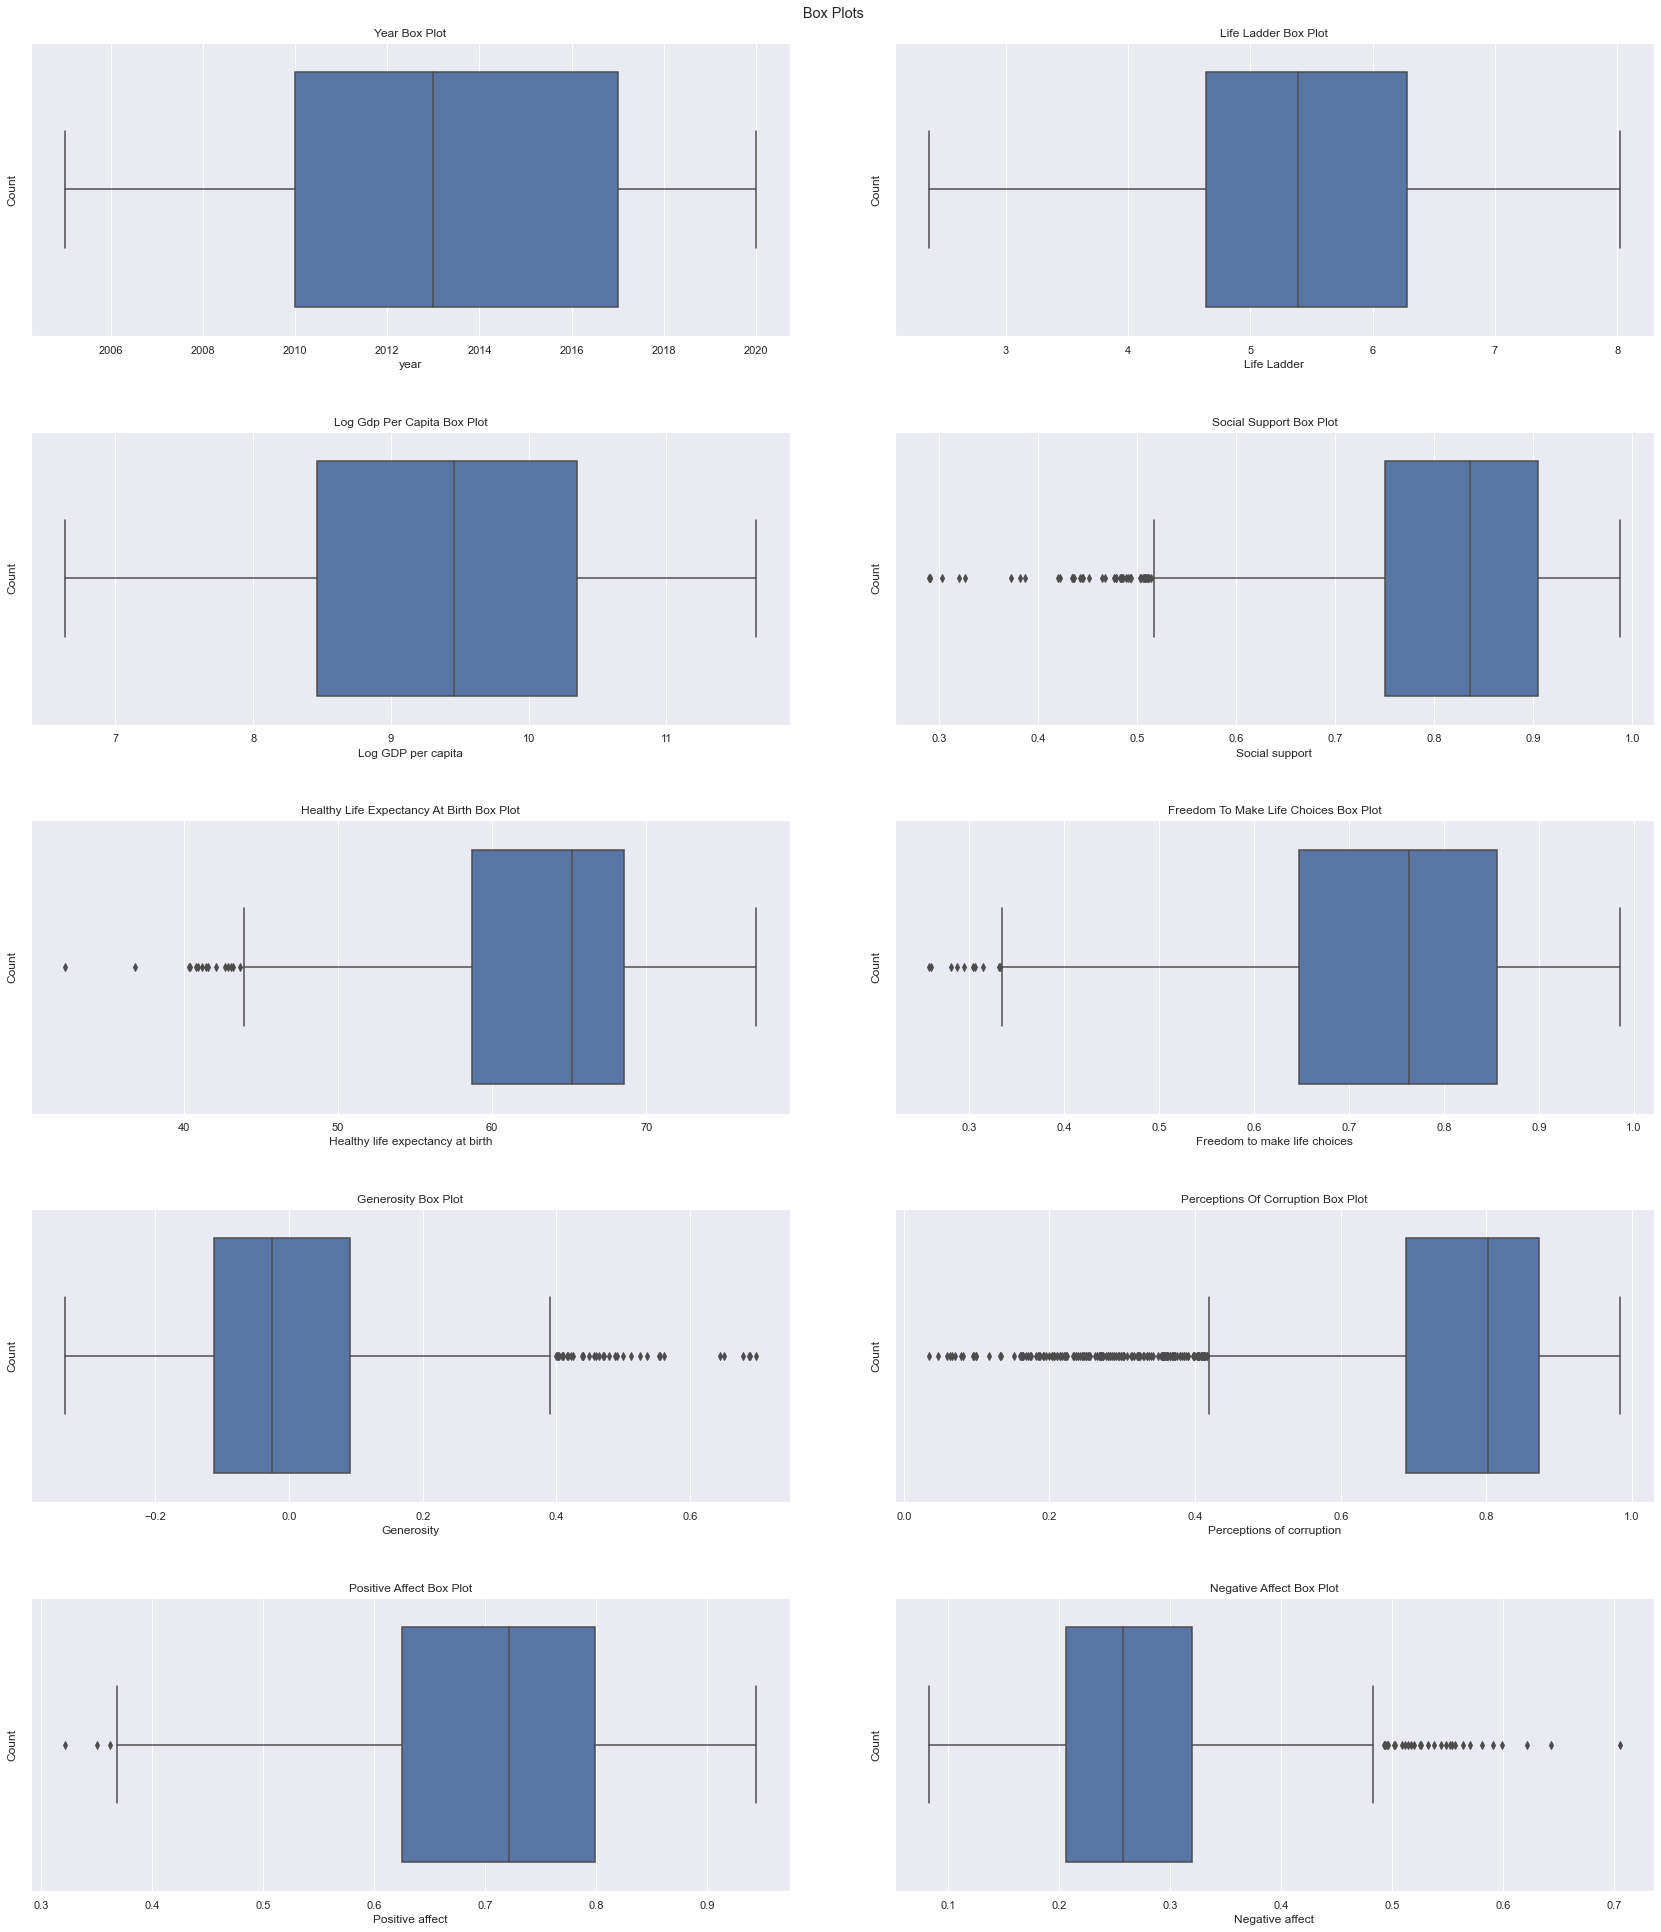

In [10]:
f, axes = plt.subplots(5,2,figsize=(25,28))
f.tight_layout(pad=6)
f.suptitle('Box Plots')
cols= df.select_dtypes(exclude='object') 


# assign a starting point
x_axes = 0 
y_axes = 0

# Drawing graphics on a 5x2 area
for col in cols:
  sns.boxplot(data=df, x=col, ax=axes[x_axes, y_axes]) # kde : curve at the top
  axes[x_axes,y_axes].set_xlabel(col)
  axes[x_axes,y_axes].set_ylabel("Count")
  axes[x_axes,y_axes].set_title(f"{col.title()} Box Plot")
  
  if y_axes == 1:
    y_axes = 0
    x_axes += 1
  else:
    y_axes += 1
plt.savefig('Plots/box_plots.png')
plt.show()

In [11]:
year_group = df.groupby(by='year').sum()

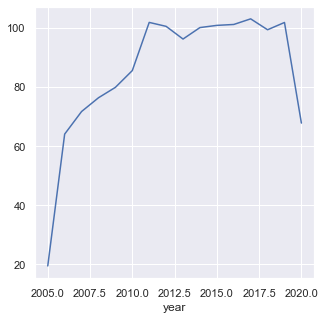

In [12]:
plt.figure(figsize=(5, 5))
year_group['Positive affect'].plot()
plt.savefig('Plots/Positive_affect_plot.png')

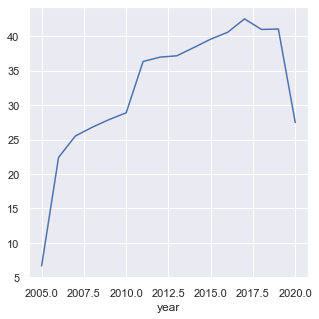

In [13]:
plt.figure(figsize=(5, 5))
year_group['Negative affect'].plot()
plt.savefig('Plots/Negative_affect_plot.png')

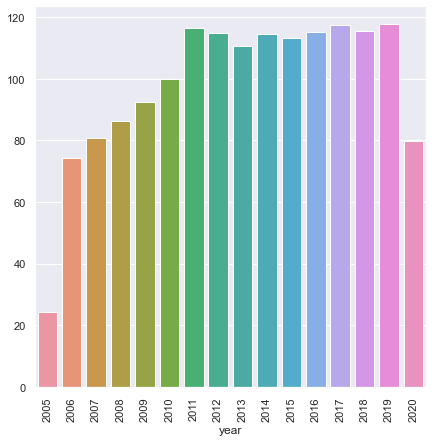

In [14]:
plt.figure(figsize=(7, 7))
ax1= sns.barplot(x=year_group.index, y=year_group['Social support'].values)
#ax1.tick_params(axis='x')
ax1.tick_params(axis='x', rotation=90)
# ax1.tick_params(axis='x', rotation=45)
plt.savefig('Plots/SocialSupport.png')

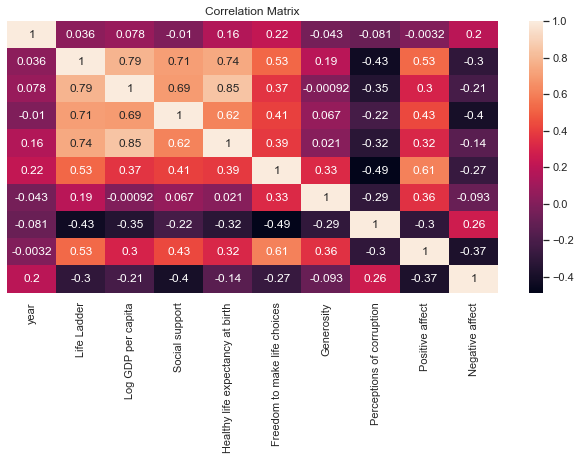

In [15]:
sns.set(rc={'figure.figsize':(11,5)}) 
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True,yticklabels=False) # annot : show correlation values
plt.savefig('Plots/Correlation_matrix.png')

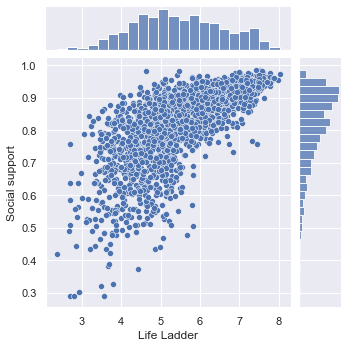

In [16]:
# sns.jointplot(data=df, x='year', y='Social support')
sns.jointplot(data=df, x='Life Ladder', y='Social support',height=5)
plt.savefig('Plots/jointplots.png')

In [17]:
import os 
from os import listdir, mkdir
from os.path import isfile, join

In [18]:
# listing files in folder
all_files = os.listdir('Plots')
all_files

['box_plots.png',
 'Correlation_matrix.png',
 'histogram_plots.png',
 'jointplots.png',
 'Negative_affect_plot.png',
 'Positive_affect_plot.png',
 'SocialSupport.png']

In [19]:
# file paths
reports= [f'Plots/{file}' for file in all_files]
reports

['Plots/box_plots.png',
 'Plots/Correlation_matrix.png',
 'Plots/histogram_plots.png',
 'Plots/jointplots.png',
 'Plots/Negative_affect_plot.png',
 'Plots/Positive_affect_plot.png',
 'Plots/SocialSupport.png']

In [20]:
# PDF module  
!pip install FPDF

In [21]:
from fpdf import FPDF

In [22]:
# Page area definition
# A4 size : 210 mm x 297 mm  

WIDTH = 210
HEIGHT = 297

In [23]:
pdf=FPDF()

pdf.set_font('Arial', 'B', 60) # B : Bold # 60 : Font Size
pdf.add_page()

pdf.cell(200, 250, txt = 'REPORT', align='C')

# add all graphics to pdf                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             DF'e yazdırma
for report in reports:
    pdf.add_page()
    pdf.set_font('Arial', 'B', 18)
    pdf.cell(200,2, txt=report, align='C')

    pdf.image(report,3, 18, WIDTH-1)
    

pdf.output('Countries_report.pdf','F')


''